In [1]:
import pandas as pd

In [2]:
cpu = pd.read_csv('cpuUtilization.csv')

In [3]:
cpu.head(5)

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134


In [4]:
cpu['timestamp'].describe()

count                    4032
unique                   4032
top       2014-02-26 15:05:00
freq                        1
Name: timestamp, dtype: object

In [26]:
df = pd.to_datetime(cpu['timestamp'])
cpu['date'] = df.dt.date
cpu['month'] = df.dt.month
cpu['minute'] = df.dt.minute

In [27]:
cpu.head()

,timestamp,value,date,minute,month
0,2014-02-14 14:30:00,0.132,2014-02-14,30,2
1,2014-02-14 14:35:00,0.134,2014-02-14,35,2
2,2014-02-14 14:40:00,0.134,2014-02-14,40,2
3,2014-02-14 14:45:00,0.134,2014-02-14,45,2
4,2014-02-14 14:50:00,0.134,2014-02-14,50,2


In [28]:
cpu['date'].max()

datetime.date(2014, 2, 28)

In [29]:
cpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 5 columns):
timestamp    4032 non-null object
value        4032 non-null float64
date         4032 non-null object
minute       4032 non-null int64
month        4032 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 157.6+ KB


In [30]:
df = cpu['value']

In [31]:
df.describe()

count    4032.000000
mean        0.126303
std         0.094813
min         0.066000
25%         0.132000
50%         0.134000
75%         0.134000
max         2.344000
Name: value, dtype: float64

In [32]:
list(cpu.columns.values)

['timestamp', 'value', 'date', 'minute', 'month']

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

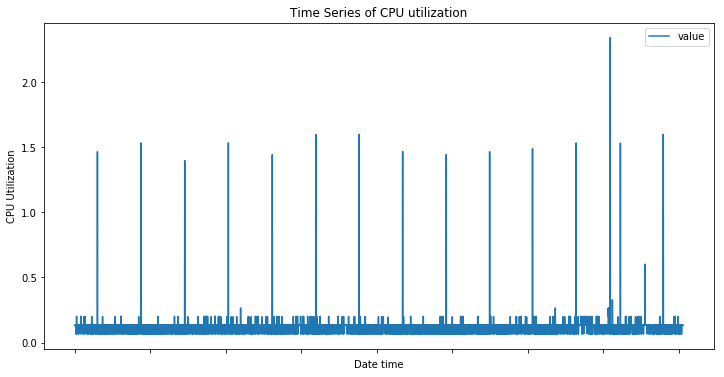

In [34]:
cpu.plot(x='timestamp', y='value', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('CPU Utilization')
plt.title('Time Series of CPU utilization');

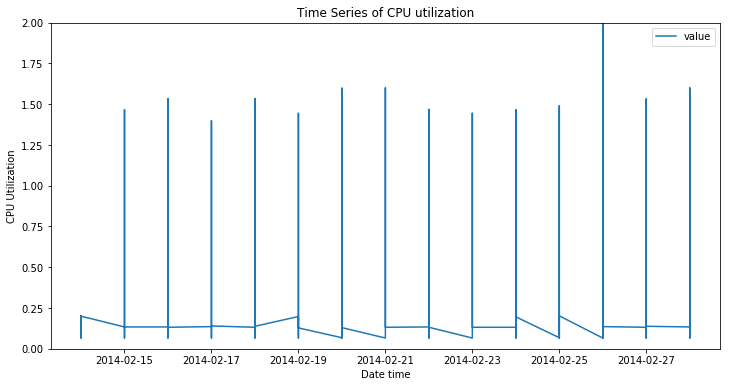

In [35]:
cpu.plot(x='date', y='value', figsize=(12,6))
plt.ylim(0.0, 2)
plt.xlabel('Date time')
plt.ylabel('CPU Utilization')
plt.title('Time Series of CPU utilization');

## k means clustering

In [36]:
import numpy as np
from sklearn.cluster import KMeans

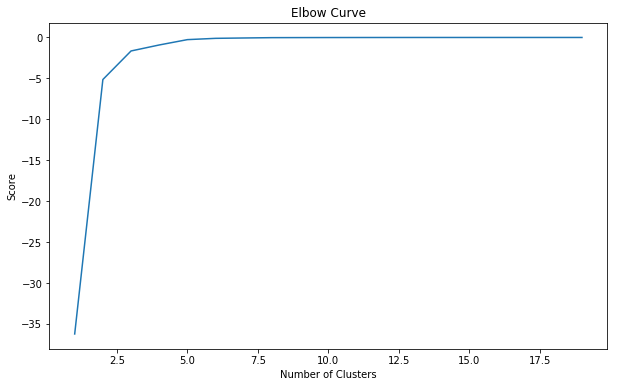

In [37]:
data = cpu[['value']]
#array.reshape(-1, 1)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

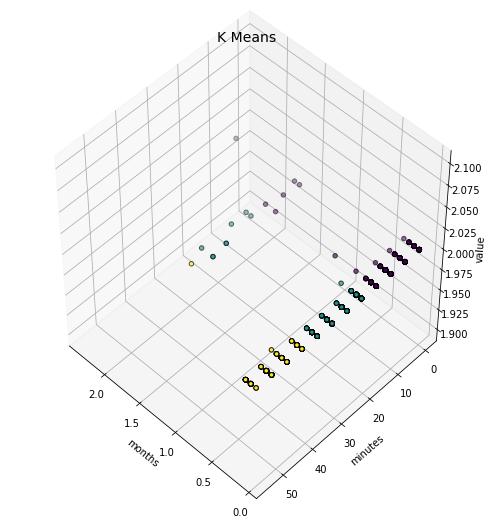

In [40]:
from mpl_toolkits.mplot3d import Axes3D
X = cpu[['value', 'minute', 'month']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("months")
ax.set_ylabel("minutes")
ax.set_zlabel("value")
plt.title("K Means", fontsize=14);

c:\users\prateek\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


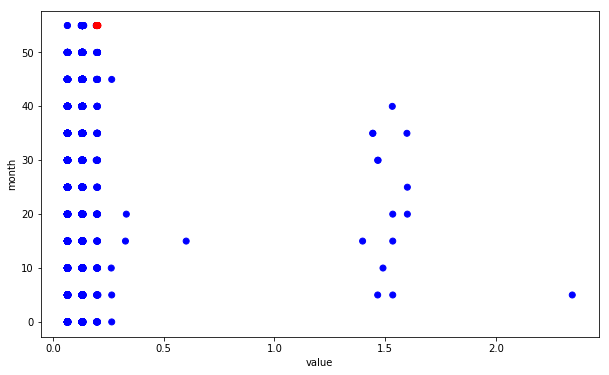

In [47]:
data = cpu[['value', 'minute', 'month']]

def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[3])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
cpu['anomaly1'] = (distance >= threshold).astype(int)

# visualisation of anomaly with cluster view
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(cpu['value'], cpu['minute'], c=cpu["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('value')
plt.ylabel('month')
plt.show();

In [ ]:
# df = cpu.sort_values('timestamp')
# cpu['date_time_int'] = df.timestamp.astype(np.int64)
fig, ax = plt.subplots(figsize=(10,6))
a = cpu.loc[cpu['anomaly1'] == 1, ['timestamp', 'value']] #anomaly

ax.plot(cpu['timestamp'], cpu['value'], color='blue', label='Normal')
ax.scatter(a['timestamp'],a['value'], color='red', label='Anomaly')
plt.xlabel('Date Time Integer')
plt.ylabel('value')
plt.legend()
plt.show();